<a href="https://colab.research.google.com/github/DavoodSZ1993/RL/blob/main/04_MC_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import gym

env= gym.make('Blackjack-v0')
env.action_space, env.action_space.sample()  # two actions: 0: stay, 1: hit

(Discrete(2), 1)

## How to Play Blackjack

* Blackjack is a card game where the goal is to obtain cards that sum to as near as possible to 21 without going over.  They're playing against a fixed dealer.

* Face cards (Jack, Queen, King) have point value 10.

* Aces can either count as 11 or 1, and it's called 'usable' at 11.

* This game is placed with an infinite deck (or with replacement).

* he game starts with each (player and dealer) having one face up and one face down card. 

* The player can request additional cards (hit=1) until they decide to stop
 (stick=0) or exceed 21 (bust).

* After the player sticks, the dealer reveals their facedown card, and draws until their sum is 17 or greater.  If the dealer goes bust the player wins.

* If neither player nor dealer busts, the outcome (win, lose, draw) is
 decided by whose sum is closer to 21.  The reward for winning is +1,
  drawing is 0, and losing is -1.
 
* The observation of a 3-tuple of: the players current sum,
 the dealer's one showing card (1-10 where 1 is ace),
  and whether or not the player holds a usable ace (0 or 1).
  
* This environment corresponds to the version of the blackjack problem
 described in Example 5.1 in Reinforcement Learning: An Introduction
 by Sutton and Barto (1998).


In [2]:
"""
Observation tuple for Blackjack:
1. Sum of players cards (ace counts 11)
2. sum of dealers card
3. player has useable ace
"""

observation_space = env.observation_space.spaces
observation_space

(Discrete(32), Discrete(11), Discrete(2))

In [3]:
# Resests the state of the environment and returns an initial observation.

observation = env.reset()
observation

(14, 1, False)

In [4]:
action = 0
observation, reward, done, info = env.step(action)
observation, reward, done, info

((14, 1, False), -1.0, True, {})

## Policy
For each observation we need an action:

In [5]:
# There are invalid states, but we don't care for convenience.
state_space_size = (33, 12, 2)

policy = np.zeros(state_space_size, dtype=int)

In [6]:
def observation_clean(observation):
  return (observation[0], observation[1], int(observation[2]))

observation = observation_clean(observation)
policy[observation]

0

## Monte Carlo Policy Evaluation


In [7]:
def run_episode(policy, env=env):
  steps = []
  observation = observation_clean(env.reset())
  done = False
  steps.append(((None, None) + (observation, 0))) # State, Action, Next State, Reward

  while not done:
    action = policy[observation]
    observation_action = (observation, action)
    observation, reward, done, info = env.step(action)
    observation = observation_clean(observation)
    steps.append(observation_action + (observation, int(reward)))

  return steps # list of tuples: (s, a, s', R)


In [8]:
run_episode(policy)

[(None, None, (18, 7, 0), 0), ((18, 7, 0), 0, (18, 7, 0), 1)]

### Side Note: Python `reversed` Fucntion:

Python reversed() method returns an iterator that accesses the given sequence in the reverse order.

#### Code Example:

```Python
Code: 

seqTuple = ('g', 'e', 'e', 'k', 's')
print(list(reversed(seqTuple)))

Output:

['s', 'k', 'e', 'e', 'g']

```

In [12]:
gamma = 0.99

N = np.zeros(state_space_size, dtype=int)
S = np.zeros(state_space_size)

# Every visit monte carlo
nb_of_episodes = 100000
for e in range(nb_of_episodes):
  observations_reward = run_episode(policy)
  G = 0.
  # print (observation_reward)
  for o0, a, o, r in reversed(observations_reward):
    G = r + gamma * G
    N[o] += 1
    S[o] +=G
    # print(o, r, G)

Gs = np.zeros(state_space_size)
Gs[N!=0] = S[N!=0] / N[N!=0]

## Side Note: Matplotlib Toolkits:

Toolkits are collections of application-specific functions that extend matplotlib

#### `mplot3d`:
`mpl_toolkits.mplot3d` provides some basic 3D plotting (scatter, surf, line, mesh) tools. Not the fastest or feature complete 3D library out there, but ships with matplotlib and thus may be lighter weight solution for some use cases.

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm                # Builtin colormaps, colormap handling utilities, ....
%matplotlib inline

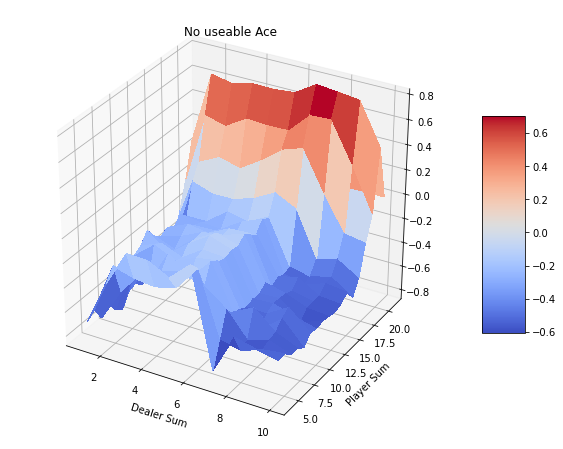

In [16]:
A = np.arange(1, 11)
B = np.arange(4, 22)
A, B = np.meshgrid(A, B) # I think it's required for 3D plotting

V = Gs[4:22, 1:11, 0]
fig = plt.figure(figsize=(10,8))      # Sets figure size
ax = fig.gca(projection='3d')         # To get the current polar axes on the current figure
surf = ax.plot_surface(A, B, V, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_ylabel("Player Sum")
ax.set_xlabel("Dealer Sum")
ax.set_title("No useable Ace")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

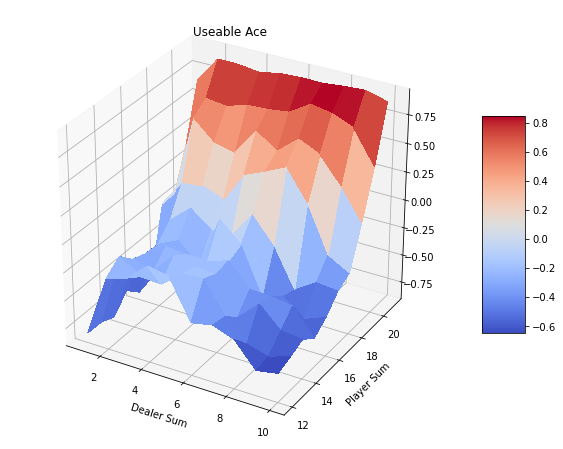

In [19]:
A = np.arange(1, 11)
B = np.arange(12, 22)
A, B = np.meshgrid(A, B)

V = Gs[12:22, 1:11, 1]
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A, B, V, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_ylabel("Player Sum")
ax.set_xlabel("Dealer Sum")
ax.set_title("Useable Ace")
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()